The following notebook contains solution to PartI of the Assignment two.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

0. Downloading the toydata.csv

1. Data Exploration:

1. a) Load the given dataset:

In [2]:
data = pd.read_csv("toydata.csv") # 1. (a)

1. (b) Visualize the dataset using a scatter plot distinguishing data points by color (e.g., ‘blue’, ‘green’)
according to their class label:  

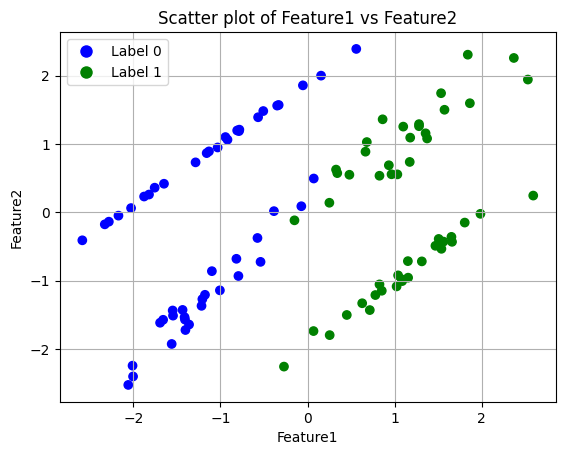

In [7]:
# 1. (b)
colors = ['blue' if label == 0 else 'green' for label in data['Label']]

plt.scatter(data['Feature1'], data['Feature2'], c=colors)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Scatter plot of Feature1 vs Feature2')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10)],
           labels=['Label 0', 'Label 1'])
plt.grid(True)
plt.show()

1. (c) Exhibit the first few rows of the dataset:

In [9]:
# 1 (c)
data.head(7) #prints first seven rows of the dataset.

,Feature1,Feature2,Label
0,0.559426,2.388694,0
1,1.312175,-0.717315,1
2,-1.559849,-1.924874,0
3,-2.281386,-0.136856,0
4,1.560704,-0.427958,1
5,-0.808045,1.196641,0
6,-0.270624,-2.255540,1


1. (d) Present basic statistics of the descriptive features within the dataset.


In [10]:
# 1 (d)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  100 non-null    float64
 1   Feature2  100 non-null    float64
 2   Label     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [12]:
data.describe() 
#actual answer that shows stats for continous data in dataset.

,Feature1,Feature2,Label
count,100.000000,100.000000,100.000000
mean,-0.027714,-0.048848,0.500000
std,1.323957,1.230126,0.502519
min,-2.585909,-2.523434,0.000000
25%,-1.185113,-1.097573,0.000000
50%,0.069846,-0.035241,0.500000
75%,1.089659,1.035708,1.000000
max,2.591239,2.388694,1.000000


2. Data Prepatation: